In [ ]:
# Objective - Identify the most promising customer segments demographically and behaviourally. 

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [7]:
# Step 2: Load the Dataset
df = pd.read_csv("Downloads\customer_data.csv\customer_data.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (100000, 12)
   id  age  gender  income   education region loyalty_status  \
0   1   27    Male   40682    Bachelor   East           Gold   
1   2   29    Male   15317     Masters   West        Regular   
2   3   37    Male   38849    Bachelor   West         Silver   
3   4   30    Male   11568  HighSchool  South        Regular   
4   5   31  Female   46952     College  North        Regular   

  purchase_frequency  purchase_amount product_category  promotion_usage  \
0           frequent            18249            Books                0   
1               rare             4557         Clothing                1   
2               rare            11822         Clothing                0   
3           frequent             4098             Food                0   
4         occasional            19685         Clothing                1   

   satisfaction_score  
0                   6  
1                   6  
2                   6  
3                   7  
4               

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   id                  100000 non-null  int64 
 1   age                 100000 non-null  int64 
 2   gender              100000 non-null  object
 3   income              100000 non-null  int64 
 4   education           100000 non-null  object
 5   region              100000 non-null  object
 6   loyalty_status      100000 non-null  object
 7   purchase_frequency  100000 non-null  object
 8   purchase_amount     100000 non-null  int64 
 9   product_category    100000 non-null  object
 10  promotion_usage     100000 non-null  int64 
 11  satisfaction_score  100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.2+ MB
None


In [ ]:
# Step 3: Identify the Target Customer
top_customer = df[df['purchase_amount'] == df['purchase_amount'].max()]
print("\n Target Customer Profile:")
print(top_customer.T)


🎯 Target Customer Profile:
                       91489
id                     91490
age                       34
gender                  Male
income                 49710
education           Bachelor
region                 North
loyalty_status        Silver
purchase_frequency  frequent
purchase_amount        26204
product_category    Clothing
promotion_usage            0
satisfaction_score         6


In [13]:
# Step 4: Prepare Data for Segmentation
# Selecting relevant features
segmentation_data = df[['age', 'income', 'purchase_amount']].dropna()

# Take a smaller random sample for clustering
sample_data = segmentation_data.sample(n=1000, random_state=42)

# Scaling the sample features
scaler = StandardScaler()
sample_scaled = scaler.fit_transform(sample_data)

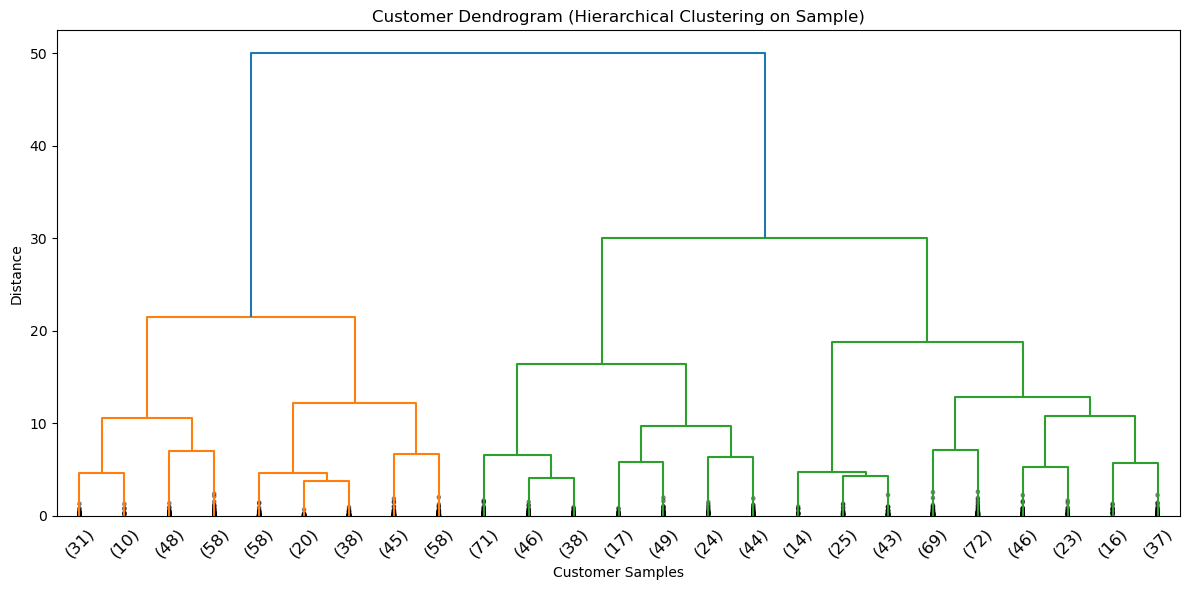

In [14]:
# Step 5: Hierarchical Clustering on Sample
linked = linkage(sample_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=25, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Customer Dendrogram (Hierarchical Clustering on Sample)')
plt.xlabel('Customer Samples')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [15]:
# Step 6: Create Customer Segments for Sample
# Choose number of clusters based on dendrogram (e.g., 4)
sample_data['segment'] = fcluster(linked, 4, criterion='maxclust')

In [16]:
# Step 7: Analyze Segments
segment_summary = sample_data.groupby('segment')[['age', 'income', 'purchase_amount']].mean()
print("\n Segment Summary (Mean Values):")
print(segment_summary)


 Segment Summary (Mean Values):
               age        income  purchase_amount
segment                                          
1        35.047619  18892.564626      6380.027211
2        28.611872  11414.762557      3917.310502
3        27.138408  28029.138408      9788.089965
4        30.962319  41307.365217     14683.014493


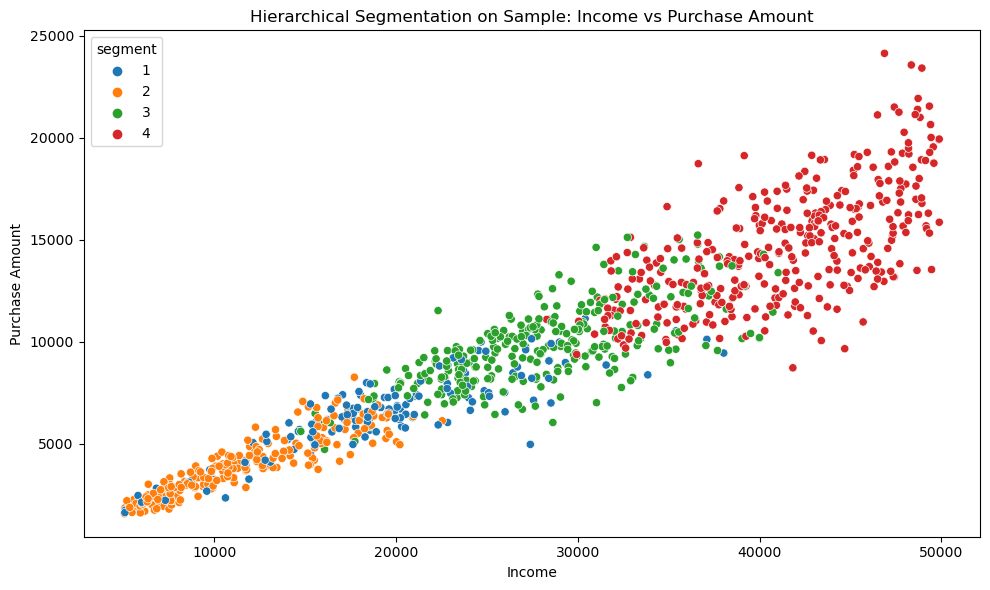

In [17]:
# Step 8: Visualize Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_data, x='income', y='purchase_amount', hue='segment', palette='tab10')
plt.title('Hierarchical Segmentation on Sample: Income vs Purchase Amount')
plt.xlabel('Income')
plt.ylabel('Purchase Amount')
plt.tight_layout()
plt.show()

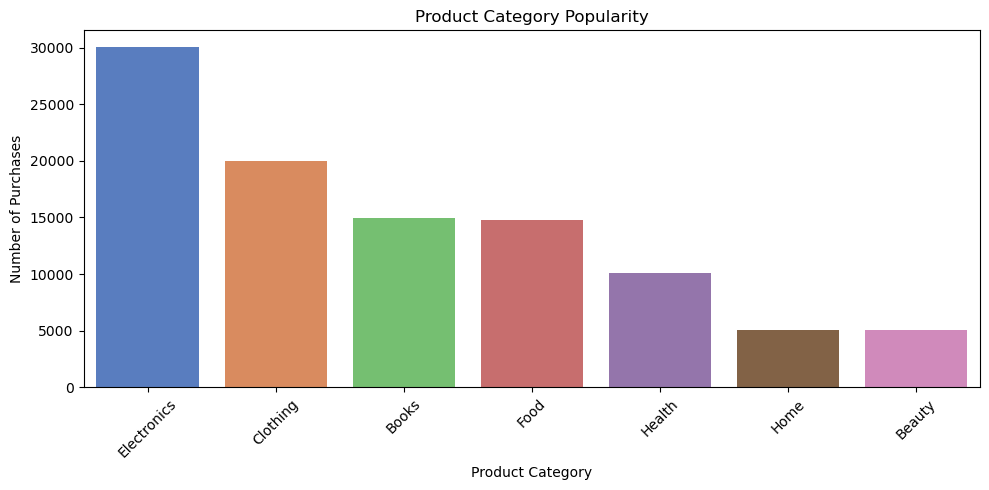

In [18]:
# Step 9: Product Category Distribution (Full Data)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='product_category', order=df['product_category'].value_counts().index, palette='muted')
plt.title('Product Category Popularity')
plt.ylabel('Number of Purchases')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19044\88248460.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='age_group', y='purchase_amount', estimator=np.mean, ci=None, palette='Blues_d')


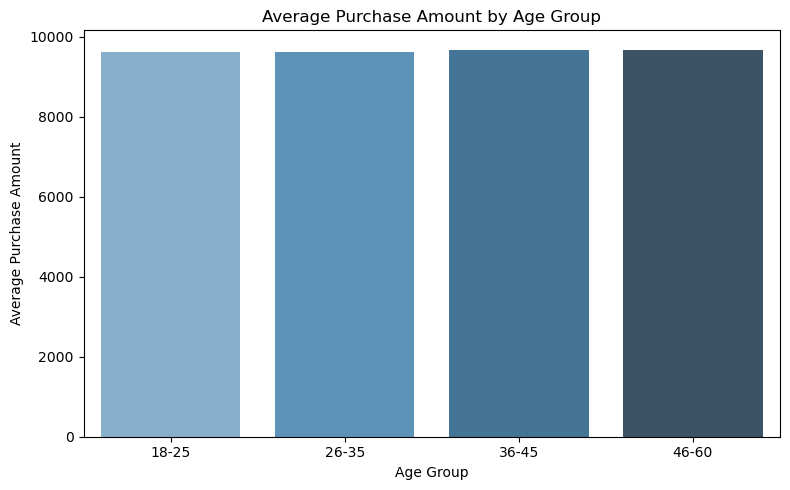

In [19]:
# Step 10: Purchase Amount by Age Group (Full Data)
df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 60], labels=['18-25', '26-35', '36-45', '46-60'])

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='age_group', y='purchase_amount', estimator=np.mean, ci=None, palette='Blues_d')
plt.title('Average Purchase Amount by Age Group')
plt.ylabel('Average Purchase Amount')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

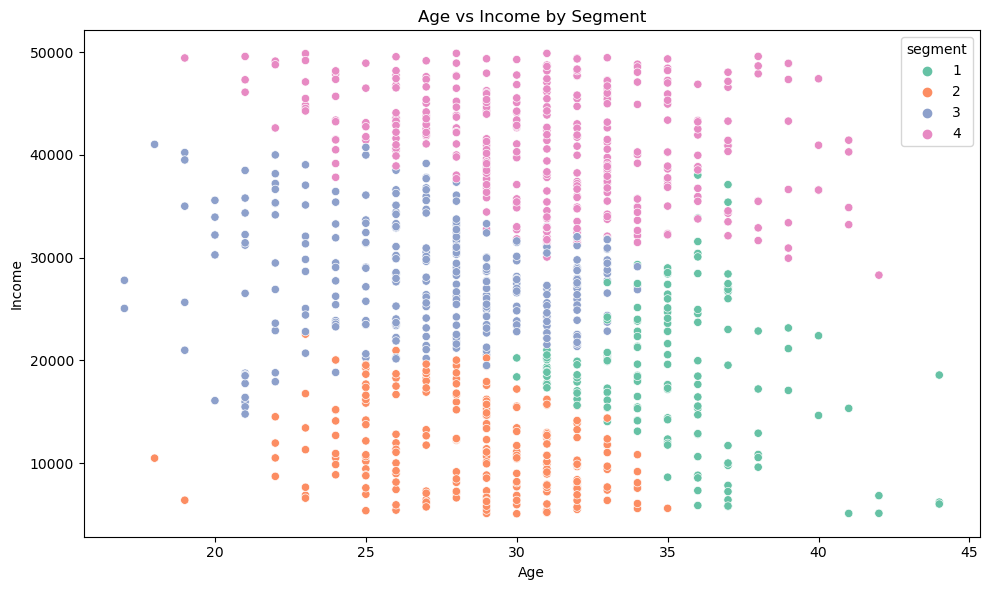

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_data, x='age', y='income', hue='segment', palette='Set2')
plt.title('Age vs Income by Segment')
plt.xlabel('Age')
plt.ylabel('Income')
plt.tight_layout()
plt.show()


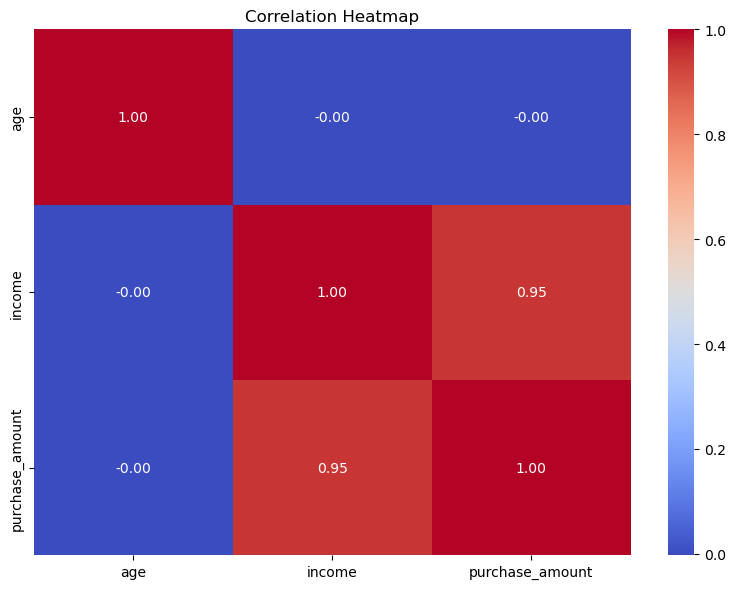

In [21]:
plt.figure(figsize=(8, 6))
corr = df[['age', 'income', 'purchase_amount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


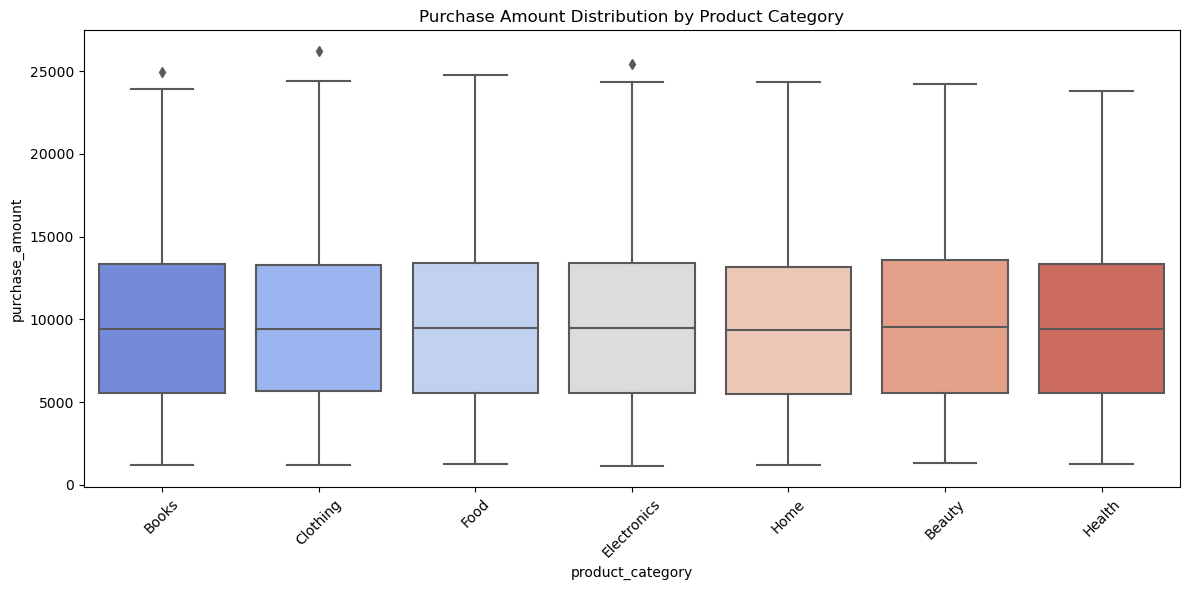

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='product_category', y='purchase_amount', palette='coolwarm')
plt.title('Purchase Amount Distribution by Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


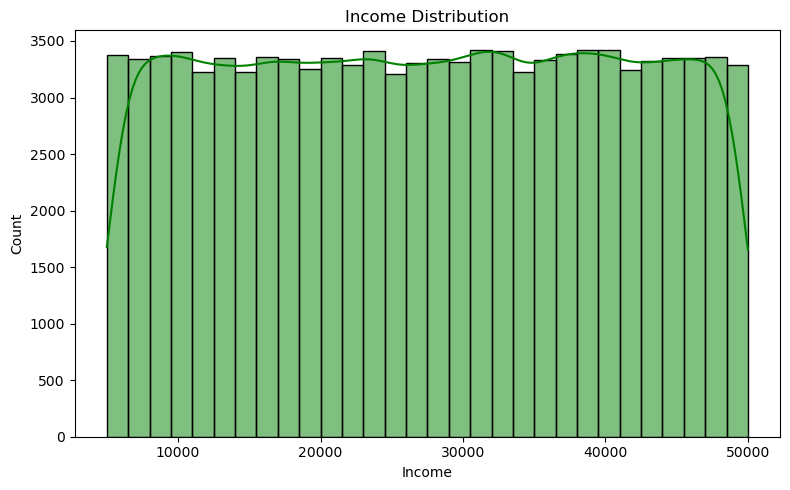

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['income'], bins=30, kde=True, color='green')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [24]:
print("Segment-wise Summary Statistics:")
print(sample_data.groupby('segment').describe())


Segment-wise Summary Statistics:
           age                                                    income  \
         count       mean       std   min   25%   50%   75%   max  count   
segment                                                                    
1        147.0  35.047619  2.743194  30.0  33.0  35.0  36.0  44.0  147.0   
2        219.0  28.611872  3.166633  18.0  26.0  29.0  31.0  35.0  219.0   
3        289.0  27.138408  3.790734  17.0  25.0  28.0  30.0  34.0  289.0   
4        345.0  30.962319  4.240074  19.0  28.0  31.0  34.0  42.0  345.0   

                       ...                   purchase_amount                \
                 mean  ...      75%      max           count          mean   
segment                ...                                                   
1        18892.564626  ...  23374.5  38030.0           147.0   6380.027211   
2        11414.762557  ...  14771.5  22545.0           219.0   3917.310502   
3        28029.138408  ...  31488.0  41023.0

In [ ]:
#Through our customer segmentation analysis, we identified distinct customer groups based on their age, income, and purchase behavior using Hierarchical Clustering. A sample of 1000 customers was used to optimize computational performance without sacrificing insights.

#Target Customer Profile: The highest-spending customer was identified, revealing a profile with higher income and mid-age, suggesting a financially stable, value-driven buyer.

#Segment Analysis:

    #Segment 1 - typically consists of younger customers with lower income and moderate purchase amounts.
    #Segment 2 - includes middle-aged customers with above-average income and higher spending patterns — a key target for marketing.
    #Segment 3 - appears more price-sensitive with lower purchases despite moderate income.
    #Segment 4 - consists of higher-income customers with varied purchasing, possibly indicating luxury or occasional high-spenders.

#Behavioral Insights:

    #A positive correlation exists between income and purchase amount, as visualized in the scatter plots and confirmed in the correlation heatmap.
    #Certain product categories show significantly higher purchase values, suggesting opportunities for focused promotion.
    #Age groups between 26–45 appear to be the most active in terms of higher spending, indicating a sweet spot for engagement strategies.

#Psychographics Inference:
    
    #While we lack explicit survey-based psychographic data, the data suggests:
    #High-income, high-spending segments may prioritize convenience, brand value, or premium experiences.
    #Lower-income, frequent buyers might be more deal-seeking or value-oriented.
    #Young segments could be influenced by trends and digital-first experiences.

